### Installing environment
- mecab install : https://sanghyu.tistory.com/170
- kkma 

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.launchpad.net

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading

In [5]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   872k      0  0:00:01  0:00:01 --:--:-- 13.3M
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source) [with Target = std::__cxx11::basic_string<char>; Source = std::_

In [6]:
! pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
"""! pip install git+https://github.com/ssut/py-hanspell.git"""

'! pip install git+https://github.com/ssut/py-hanspell.git'

In [8]:
"""! pip install git+https://github.com/haven-jeon/PyKoSpacing.git"""

'! pip install git+https://github.com/haven-jeon/PyKoSpacing.git'

In [9]:
#필요한 라이브러리들
import pandas as pd
import numpy as np
import tensorflow as tf
from gensim.models import FastText
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 걱정, 사랑 라벨링 데이터

In [14]:
df = pd.read_csv("/content/drive/MyDrive/cp1_project/lstm_real/label.csv")

In [15]:
df.shape

(36326, 3)

In [16]:
df.columns

Index(['Unnamed: 0', 'sentences', 'label'], dtype='object')

In [17]:
df.isna().sum(), df.duplicated().sum()

(Unnamed: 0    0
 sentences     0
 label         0
 dtype: int64, 0)

In [18]:
df.drop(columns=['Unnamed: 0'], inplace=True)

'\n0 : 사랑의 슬픔, \n1 : 사랑의 즐거움, \n2: 사랑의 원망, \n3 : 사랑의 분노, \n4 : 걱정의 실망, \n5 : 걱정의 희망, \n6 : 걱정의 슬픔, \n7 : 걱정의 분노\n\n'

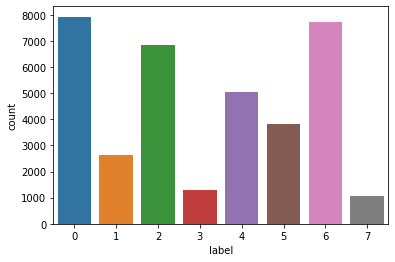

In [19]:
sns.countplot(data=df, x='label')

"""
0 : 사랑의 슬픔, 
1 : 사랑의 즐거움, 
2: 사랑의 원망, 
3 : 사랑의 분노, 
4 : 걱정의 실망, 
5 : 걱정의 희망, 
6 : 걱정의 슬픔, 
7 : 걱정의 분노

"""

### Upsampling & SMOTE

In [20]:
#철자 검사기
"""from hanspell import spell_checker
from pykospacing import Spacing"""

'from hanspell import spell_checker\nfrom pykospacing import Spacing'

In [21]:
import re
import os
from tqdm import tqdm
def clean_docs (raw):
  #띄어쓰기 검사
  #space = Spacing()
  #raw = raw.apply(lambda x : space(x))
  #불필요한 문자 제거
  punct = "/'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
  regex_punct = re.compile("["+ punct + "]+")
  raw = raw.apply(lambda x: regex_punct.sub("", x))
  regex_kr = re.compile('[A-Za-z0-9]+')
  raw = raw.apply(lambda x : regex_kr.sub(" ", x))
  regex_space = re.compile('\s+')
  documents = raw.apply(lambda x : regex_space.sub(" ", x))
  #철자 확인
  #ocuments = documents.apply(lambda x : spell_checker.check(x).checked)
  
  return documents
  
def tokenizer (sentence):
  kkma = Kkma()
  error_list = []
  #불용어처리
  current_path = os.getcwd()
  f = open("/content/drive/MyDrive/cp1_project/lstm_real/stop_words.txt", 'r', encoding='utf-8')
  stop_words= [line.replace('\n','') for line in f.readlines()]

  #영어로 Nan된 document 삭제
  try : 
      tokens = [word[0] for word in kkma.pos(sentence) if len(word) > 1 
                      and (word[0] not in stop_words)
                      and (not word[1].startswith('J'))
                      and (not word[1].startswith('E'))]
#tfidf에 넣을 때는 필요 없음
  except Exception:
      print('error', sentence, i)
      error_list.append(i)
      tokens='error'

  return tokens

In [22]:
df['tokens'] = clean_docs(df['sentences'])

### 토큰나이징

In [23]:
df_token = pd.read_csv("/content/drive/MyDrive/cp1_project/lstm_real/label_tokens.csv")

In [24]:
tokens = df_token['tokens']

In [25]:
documents = clean_docs(df_token['sentences'])

In [26]:
df_token.query("tokens=='error'")

,Unnamed: 0,Unnamed: 0.1,sentences,label,tokens


### TFidf vectorization
- 보통 이러한 방법을 text representation이라고 한다

- 아래와 같은 방법들이 있따
1. 언어통계모델 : TFidf(Term frequency-Inverse Document Frequency), TF (Term Frequency)

2. One hot encoding : 위치 기반 인코딩(희소행렬, 0과 1)
3. Word2Vec : word embeddeing 방법 중 하나로, 단어 기반 임베딩이다. 얕은 신경망을 이용하여 투사층의 룩업테이블을 단어의 벡터로 사용한다
- CBOW : 주변단어로 중심단어를 예측
- Skip-gram : 중심단어로 주변단어를 예측
4. FastText : 철자 기반 임베딩. 어휘집합에 없는 단어의 벡터도 구할 수 있음

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

max_len = 100
tfidf = TfidfVectorizer(tokenizer=tokenizer, analyzer='char', ngram_range=(1,5),
                       smooth_idf=True, sublinear_tf=True, max_features=max_len,  min_df=2, max_df=0.95)
vectors = tfidf.fit_transform(documents)

In [28]:
#tdm만들기
dtm = pd.DataFrame(vectors.todense(), columns=tfidf.get_feature_names())
dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가,것,그,그,나,내,다,말,사,수,...,자,정,주,지,지,하,한,한,해,했
0,0.0,0.0,0.180914,0.0,0.201055,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.256498,0.000000,0.000000,0.000000,0.000000,0.0,0.216853,0.000000
1,0.0,0.0,0.215526,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.258342,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.235659,0.0,...,0.000000,0.000000,0.248657,0.000000,0.000000,0.000000,0.000000,0.0,0.210223,0.000000
3,0.0,0.0,0.000000,0.0,0.191107,0.222420,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.147219,0.000000,0.151324,0.000000,0.0,0.206123,0.000000
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.279078,0.000000,0.0,...,0.000000,0.000000,0.000000,0.159866,0.210524,0.164323,0.000000,0.0,0.223830,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36321,0.0,0.0,0.207063,0.0,0.000000,0.267821,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.182213,0.000000,0.0,0.000000,0.276009
36322,0.0,0.0,0.000000,0.0,0.153153,0.178247,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.199759,0.263059,0.000000,0.141758,0.0,0.279685,0.000000
36323,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.196663,0.226179,0.225826,0.136362,0.179572,0.140164,0.163843,0.0,0.000000,0.000000
36324,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.179853,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [29]:
vectors = np.array(vectors.todense())

### FastText

In [30]:
#FastTeta모델 불러오기 : pickle로 불어오면 제대로 쓰지 못함..!
"""import pickle
with open("/content/drive/MyDrive/cp1_project/lstm_real/fast_text.model", "rb") as f:
  my_fast = pickle.load(f)

with open("/content/drive/MyDrive/cp1_project/lstm_real/vectors.kv", "rb") as fv:
  fast_vectors = pickle.load(fv)"""

'import pickle\nwith open("/content/drive/MyDrive/cp1_project/lstm_real/fast_text.model", "rb") as f:\n  my_fast = pickle.load(f)\n\nwith open("/content/drive/MyDrive/cp1_project/lstm_real/vectors.kv", "rb") as fv:\n  fast_vectors = pickle.load(fv)'

In [31]:
embedding_matrix = np.load("/content/drive/MyDrive/cp1_project/lstm_real/embedding_matrix.npy")

In [32]:
embedding_matrix.shape

(100, 300)

In [33]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

label = df['label']
X_train, X_val, y_train, y_val = train_test_split(vectors,label, test_size=0.2)

In [34]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29060, 100), (7266, 100), (29060,), (7266,))

### Data Imbalance : Resampling
- 데이터 불균형을 해결하는 2가지 방법
  1. 전처리
  2. 분류 알고리즘 전체를 수정해 minority class에 가중치를 부여
  3. 데이터 자체의 분류를 수정
  -> 재환님이 사용하 방법! 

  - majority class를 기준으로 다시 subclass를 만들어서 사용함)

- 전처리 활용 (resampling)
  1. downsampling/undersampling : 데이터가 많은 클래스의 데이터를 줄이는 방법. 성능이 안좋기 때문에 대체로 쓰지 않음
  2. upsampling/oversampling : 데이터가 적은 클래스의 데이터를 늘리는 방법.
  3. SMOTE : minority class의 샘플들 사이를 선으로 이어 그 중간값을 택하여 만들어내는 방식

- SMOTE의 종류
  - 일바적인 스모트는 nearest-neightbours를 찾아서 선으로 잇고 그 중간값을 찾는다.
  - (-)  O(n2)의 시간복잡도 소용
  1. SMOTE-SVM
  - support vectors(경계선과 가까운 벡터들)에 속하는 instance들만 SMOTE algorithms 학습 시키는 방법. SVM으로 학습 -> support vector와 가까운 샘플들은 SMOTE로 오버샘플링
  - 경계선간의 경계가 뚜렷해지는 장점!

  2. WEMOTE
  - **WEMOTE** : 모든 샘플들의 이웃을 찾아 시간소요가 많은 기본 스모트의 한계를 극복하기 위해 등장한 알고리즘으로, 두개의 랜덤 벡터를 뽑고 평균을 구하는 방식을 활용
  - (-) 같은 class 내의 특성들도 제각각이기에 **in-class imbalance**가 생길 수 있다 (평균으로 특성이 치우치게 됨!)

  3. CWEMOTE
  - WEMOTE의 in-class imbalance문제를 해결하기 위해, 데이터가 적은 클래스 내의 샘플들을 clustering(K-means)한 후, WEMOTE를 적용

- 염두해 두어야할 부분 : precision&recall trade-off
  - 우리 데이터는 대부분이 감정이 한쪽으로 치우져있고, 속마음을 털어놓을 때는 슬픔, 걱정 등이 대체로 많으니까 precision을 높게 설정하면 좋지 않을까? (대체로 슬픔, 걱정으로 예측 -> 그러다보면 때려맞추겠징
ㅎ)

###모델 내에서 가중치나 규제를 가하는 방법..?
- LSTM

In [35]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[(0, 6331), (1, 6331), (2, 6331), (3, 6331), (4, 6331), (5, 6331), (6, 6331), (7, 6331)]


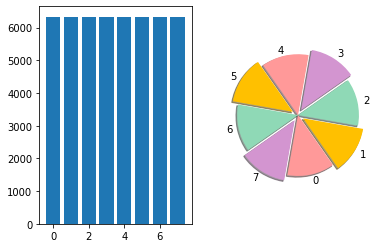

In [36]:
#SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

counter = Counter(y_resampled)
print(sorted(counter.items()))

#visuallization
values = y_resampled.value_counts()
labels = [i for i in range(0,8)]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.subplot(1,2,1)
plt.bar(x=labels, height = values)

#pie plot
explode = [0, 0.10, 0, 0.10, 0, 0.10, 0, 0.10]
plt.subplot(1,2,2)
plt.pie(values, labels=labels, startangle=260,explode=explode, shadow=True, colors=colors)
plt.show()

In [37]:
X_resampled.shape, y_resampled.shape

((50648, 100), (50648,))

In [38]:
! pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 8.8 MB/s 


In [39]:
! pip install -q "tqdm=>4.36.1"

ERROR: Invalid requirement: 'tqdm=>4.36.1'


In [40]:
#tqdm
import sys
from IPython.lib import deepreload
import tensorflow_addons as tfa
import tqdm

stdout =sys.stdout
sys.stdout = open('junk', 'w')
deepreload.reload(tqdm)
sys.stdout = stdout

print(tqdm.__version__)

tqdm_callback = tfa.callbacks.TQDMProgressBar()

4.64.0


In [41]:
#padding
X_train_padded = np.array([np.append(np.array(vector), np.array([0])) for vector in X_train])
X_val_padded = np.array([np.append(np.array(vector), np.array([0])) for vector in X_val])

In [42]:
X_train_padded.shape, X_val_padded.shape

((29060, 101), (7266, 101))

In [48]:
y_train_onehot = to_categorical(y_train, num_classes=8)
y_val_onehot = to_categorical(y_val, num_classes=8)

In [44]:
! pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 4.5 kB/s 
     |████████████████████████████████| 5.8 MB 48.3 MB/s 
     |████████████████████████████████| 1.6 MB 49.6 MB/s 
     |████████████████████████████████| 438 kB 47.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [45]:
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Flatten, Input
import tensorflow as tf
from sklearn.model_selection import train_test_split

max_len = X_train_padded.shape[1]
vocab_size = len(tfidf.get_feature_names())

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim=300, input_length=101, weights=[embedding_matrix]))
model.add(LSTM(256, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
#model.add(LSTM(512, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 101, 300)          30000     
                                                                 
 lstm (LSTM)                 (None, 101, 256)          570368    
                                                                 
 flatten (Flatten)           (None, 25856)             0         
                                                                 
 dense (Dense)               (None, 8)                 206856    
                                                                 
Total params: 807,224
Trainable params: 807,224
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model.fit(X_train_padded, y_train_onehot, epochs=10, batch_size=512,
          verbose=0, callbacks=[tqdm_callback], validation_data=(X_val_padded, y_val_onehot))

Training:   0%|           0/10 ETA: ?s,  ?epochs/s

Epoch 1/10


0/57           ETA: ?s - 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph

0/57           ETA: ?s - 

Epoch 3/10


0/57           ETA: ?s - 

Epoch 4/10


0/57           ETA: ?s - 

Epoch 5/10


0/57           ETA: ?s - 

Epoch 6/10


0/57           ETA: ?s - 

Epoch 7/10


0/57           ETA: ?s - 

Epoch 8/10


0/57           ETA: ?s - 

Epoch 9/10


0/57           ETA: ?s - 

Epoch 10/10


0/57           ETA: ?s - 

In [50]:
model.evaluate(X_val_padded, y_val_onehot)

228/228 [==============================] - 32s 139ms/step - loss: 1.8944 - accuracy: 0.2125


[1.8943769931793213, 0.2124965637922287]

In [51]:
model.save('model_2.h5')